<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten

In [ ]:
cifar=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()
x=x_test

In [ ]:
names=["maybay","xehoi","chim","meo","nai","cho","ech","ngua","tauthuy","xetai"]

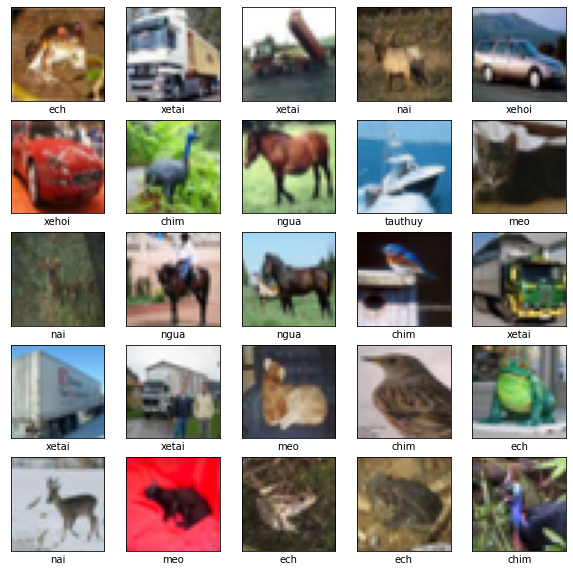

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  y=y_train[i]
  plt.xlabel(names[y[0]])
plt.show()
#0 maybay, 1 xehoi, 2 chim, 3 meo, 4 nai, 5 cho, 6 ech,7 ngua, 8 tauthuy,9 xe xuc

In [ ]:
print(x_train.shape)
print(y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3)
(50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:

x_train=x_train/255.0
x_test=x_test/255.0


In [ ]:
#defining the model...  Sequential groups a linear stack of layers into a tf.keras.Model.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode="max",restore_best_weights=True)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               1573376   
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
No

In [ ]:
#compiling the model...
from keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001) #toi uu toc do hoc
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks=[callback])


Epoch 1/50
391/391 [==============================] - 15s 38ms/step - loss: 0.8407 - accuracy: 0.7066 - val_loss: 1.3658 - val_accuracy: 0.5409
Epoch 2/50
391/391 [==============================] - 15s 37ms/step - loss: 0.8180 - accuracy: 0.7149 - val_loss: 1.3627 - val_accuracy: 0.5380
Epoch 3/50
391/391 [==============================] - 15s 37ms/step - loss: 0.7916 - accuracy: 0.7250 - val_loss: 1.3656 - val_accuracy: 0.5467
Epoch 4/50
391/391 [==============================] - 14s 37ms/step - loss: 0.7787 - accuracy: 0.7280 - val_loss: 1.3908 - val_accuracy: 0.5432
Epoch 5/50
391/391 [==============================] - 14s 37ms/step - loss: 0.7645 - accuracy: 0.7319 - val_loss: 1.3911 - val_accuracy: 0.5442
Epoch 6/50
391/391 [==============================] - 14s 37ms/step - loss: 0.7373 - accuracy: 0.7438 - val_loss: 1.4038 - val_accuracy: 0.5480
Epoch 7/50
391/391 [==============================] - 14s 37ms/step - loss: 0.7151 - accuracy: 0.7526 - val_loss: 1.4294 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/AI/cifar10.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/AI/cifar10.h5')


In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(x_test,y_test) 

313/313 [==============================] - 2s 7ms/step - loss: 1.3273 - accuracy: 0.5508


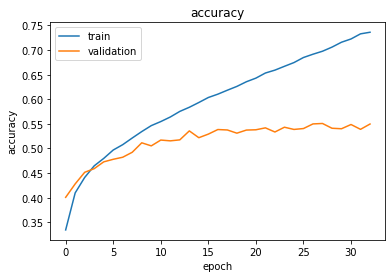

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

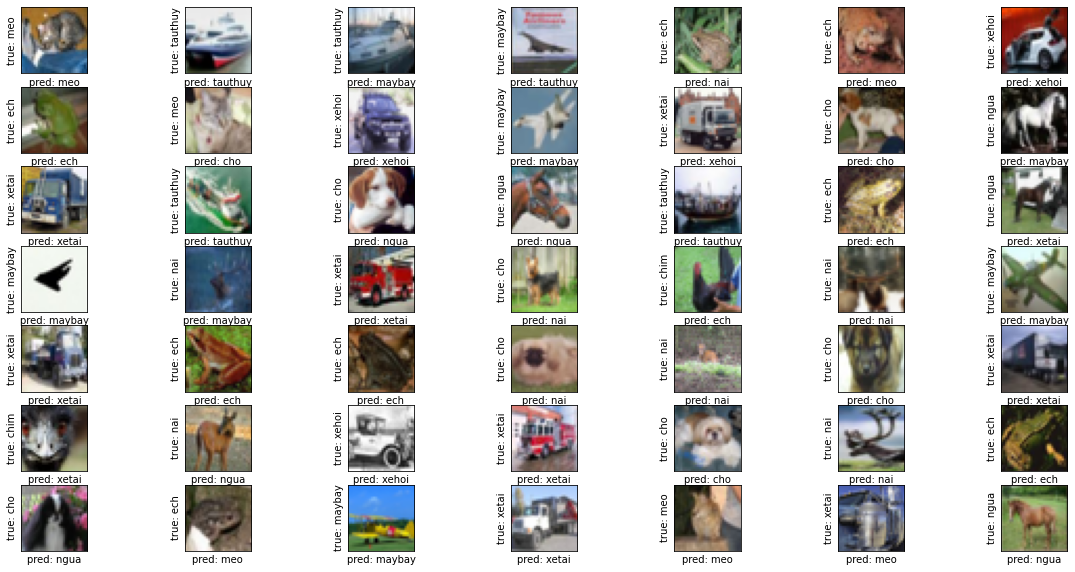

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  
  plt.xlabel("pred: "+ names[np.argmax(y_pred[i])])
  yt=y_test[i]
  plt.ylabel( "true: "+ names[yt[0]])
plt.show()